In [2]:
import random
import matplotlib as plt
import seaborn as sns
import numpy
import scipy.sparse.linalg
from scipy.stats import norm, lognorm
import math
import pandas as pd
import numpy as np

In [3]:
trueelo_a = 0 # default 0
trueelo_b = 0 # default 0

In [4]:
# variant for symmetric random walk
def a_win_binary(trueelo_a, trueelo_b):
    r_a = random.randint(0,1)
    return r_a

In [5]:
# win probability fct. with noise
def a_win_ran(trueelo_a, trueelo_b, var):
    Ex_a = 1 /(1+10**((trueelo_b-trueelo_a+np.random.normal(0, var))/400))
    if (random.uniform(0,1) < Ex_a):
        r_a = 1
    else: r_a = 0
    return r_a

In [6]:
# win probability fct
def a_win(trueelo_a, trueelo_b):
    Ex_a = 1 /(1+10**((trueelo_b+random.uniform(0,1)-trueelo_a)/400))
    if (random.uniform(0,1) < Ex_a):
        r_a = 1
    else: r_a = 0
    return r_a

In [7]:
# update fct
def elo_update(e_a, e_b, w_a):
    Ex_a = 1 /(1+10**((e_b-e_a)/400))
    Ex_b = 1 /(1+10**((e_a-e_b)/400))
    e_a = e_a + k*(w_a - Ex_a)
    e_b = e_b + k*(1 - w_a - Ex_b)
    return e_a, e_b

In [8]:
# plots pdf
def plot_line(pi, n:int, c:int):
    ind = np.zeros(2*n+1)
    for i in range (2*n+1):
        ind[i] = (i - (2*n)/2)
    d =  {'state': ind, 'pi': pi}
    sns.set_style("darkgrid")
    plt.pyplot.figure(figsize=(10,6))
    pl = sns.lineplot(data=d, x='state', y='pi')
    pl.set(xlim=(-c/2-1, c/2+1))
    pl.set_xlabel("state", fontsize = 14)
    pl.set_ylabel("$\pi$", fontsize = 14)
    plt.pyplot.show()

In [9]:
# simulates process with given s_a, i, mm
def elo_walk(s_a: int, i:int, mm: str):
    elo_walk = [0]*it
    for i in range(0,it-1):
        if mm == 'ce':
            w = a_win(trueelo_a, elo_walk[i])
            e_a, e_b = elo_update(elo_walk[i], elo_walk[i], w)
        elo_walk[i+1] = e_a
    return elo_walk

In [10]:
# simulates process with given s_a, i, mm and noise factors
def elo_walk_ran(s_a: int, i:int, v_e: int, v_g: int):
    elo_walk = [0]*it
    for i in range(0,it-1):
        w = a_win_ran(trueelo_a, elo_walk[i], v_g)
        e_a, e_b = elo_update(elo_walk[i], elo_walk[i] + np.random.normal(0,v_e), w)
        elo_walk[i+1] = np.rint(e_a)
    return elo_walk

In [11]:
# compute variance of stat. dis.
def n_variance(values, count):
    v = 0
    for i in range(len(values)):
        v += count[i] * values[i]**2
    return v / sum(count)

c:\users\grotzi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Wall time: 316 ms


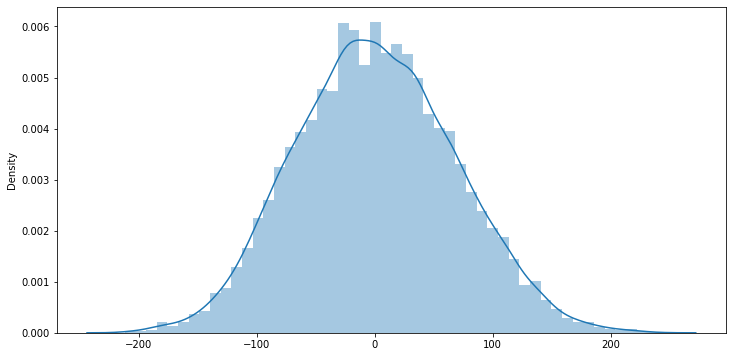

In [13]:
%%time
# example

k = 32
it = 10000
ew = elo_walk_ran(0, it, 256, 256)
plt.pyplot.figure(figsize=(12,6))
sns.distplot(ew)
values, counts = np.unique(ew, return_counts=True)

In [14]:
e_cdf = np.cumsum(counts) / it
l = len(values)
m = min(values)
v = n_variance(values, counts)
#v = 4000
x = np.linspace(m,max(values),l)
#n_pdf = np.array([norm(0,np.sqrt(v)).pdf(i) for i in x])
n_cdf = np.array([norm(0,np.sqrt(v)).cdf(i) for i in x])
np.sqrt(v)

67.39720023858558

[]

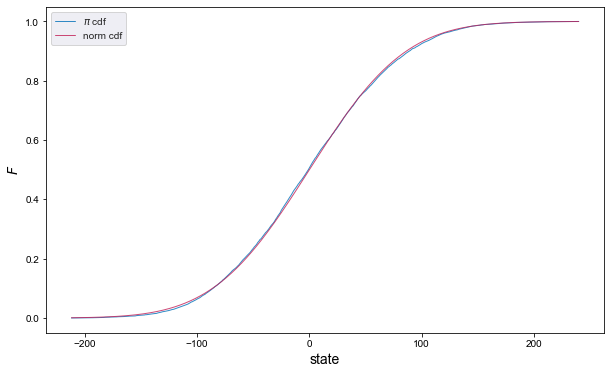

In [15]:
fig, ax = plt.pyplot.subplots(figsize=(10,6))
sns.set_style("darkgrid")
ax.set_xlabel("state", fontsize = 14)
ax.set_ylabel("$F$", fontsize = 14)
#plt.pyplot.xlim([-64*2, 64*2])
ax.plot(values, e_cdf,'#0070B8', lw=1, alpha=0.8, label='$\pi$ cdf')
ax.plot(x, n_cdf,'#C21E56', lw=1, alpha=0.8, label='norm cdf')
plt.pyplot.legend()
plt.pyplot.plot()

In [16]:
max_gap = np.max(np.abs((e_cdf-n_cdf)))
arg_max = np.argmax(np.abs(e_cdf-n_cdf))
print(max_gap, arg_max, values[arg_max])

0.054405195255172845 245 55.0


In [17]:
v

4542.3826

In [18]:
counts[17]/(2*it)

0.0002

In [19]:
v

4542.3826

In [20]:
np.sqrt(v)

67.39720023858558